# Advanced data analysis and machine learning

Project work by Radomír Bábek, Jakub Ryšánek and Vojtěch Vondráček


## Task 1: Understaning the data



In [84]:
from posixpath import sep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

Loading the train_FD001 dataset into Pandas DataFrame

In [85]:
# Read data from the first part
names = [
    "unit number",
	"time, in cycles",
	"operational setting 1",
	"operational setting 2",
	"operational setting 3"
    ]

sen_measurements = [f"sensor measurement {i}" for i in range(1, 22)]

names = names + sen_measurements

data = pd.read_csv('./NASA-Turbofan-data/data/train_FD001.txt', delim_whitespace=True, names=names)
data.info()

display(data)

# Get count, Nan count
string_stats = data.describe()
nan_count = data.isna().sum()
string_stats.loc['NaN count'] = nan_count
display(string_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit number            20631 non-null  int64  
 1   time, in cycles        20631 non-null  int64  
 2   operational setting 1  20631 non-null  float64
 3   operational setting 2  20631 non-null  float64
 4   operational setting 3  20631 non-null  float64
 5   sensor measurement 1   20631 non-null  float64
 6   sensor measurement 2   20631 non-null  float64
 7   sensor measurement 3   20631 non-null  float64
 8   sensor measurement 4   20631 non-null  float64
 9   sensor measurement 5   20631 non-null  float64
 10  sensor measurement 6   20631 non-null  float64
 11  sensor measurement 7   20631 non-null  float64
 12  sensor measurement 8   20631 non-null  float64
 13  sensor measurement 9   20631 non-null  float64
 14  sensor measurement 10  20631 non-null  float64
 15  se

/var/folders/0r/_sk4sybx66q8hvt1f_qvjv1w0000gn/T/ipykernel_81783/2084049905.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('./NASA-Turbofan-data/data/train_FD001.txt', delim_whitespace=True, names=names)


,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400
NaN count,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000


In [86]:
# Split into a dictionary of DataFrames, keyed by unit number
units = dict(tuple(data.groupby("unit number")))

# Example: get the DataFrame for unit 1
unit1 = units[1]
display(unit1)

,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


### Data Visualization

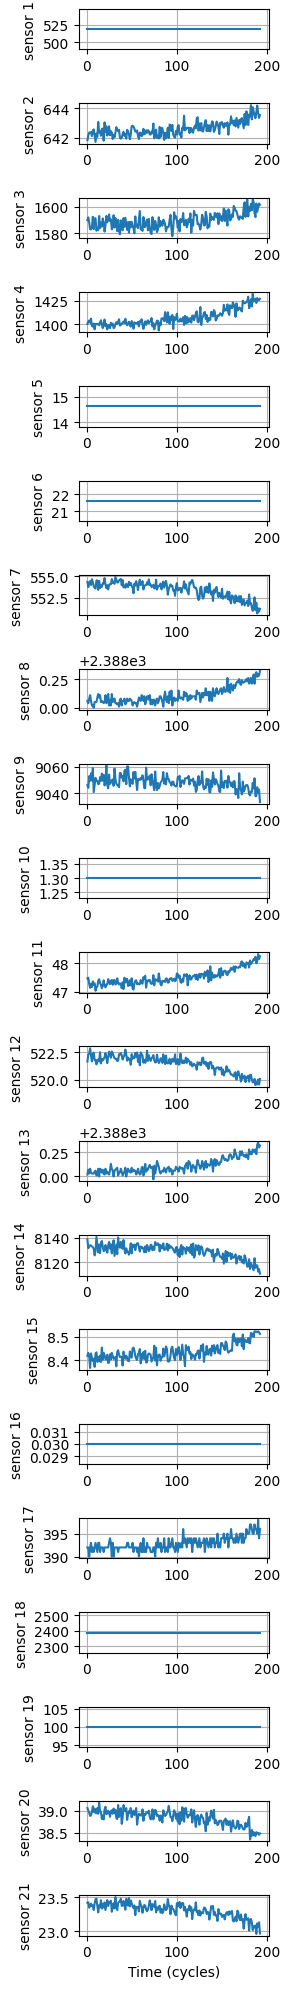

In [87]:
def plot_unit(unit):
    # Select only the sensor columns
    sensor_cols = [col for col in unit.columns if "sensor measurement" in col]

    fig, axes = plt.subplots(len(sensor_cols), 1, figsize=(3, 20))

    for i, col in enumerate(sensor_cols):
        axes[i].plot(unit["time, in cycles"], unit[col])
        axes[i].set_ylabel(f"sensor {i+1}")
        axes[i].grid(True)

    axes[-1].set_xlabel("Time (cycles)")
    plt.tight_layout()
    plt.show()

plot_unit(units[1])

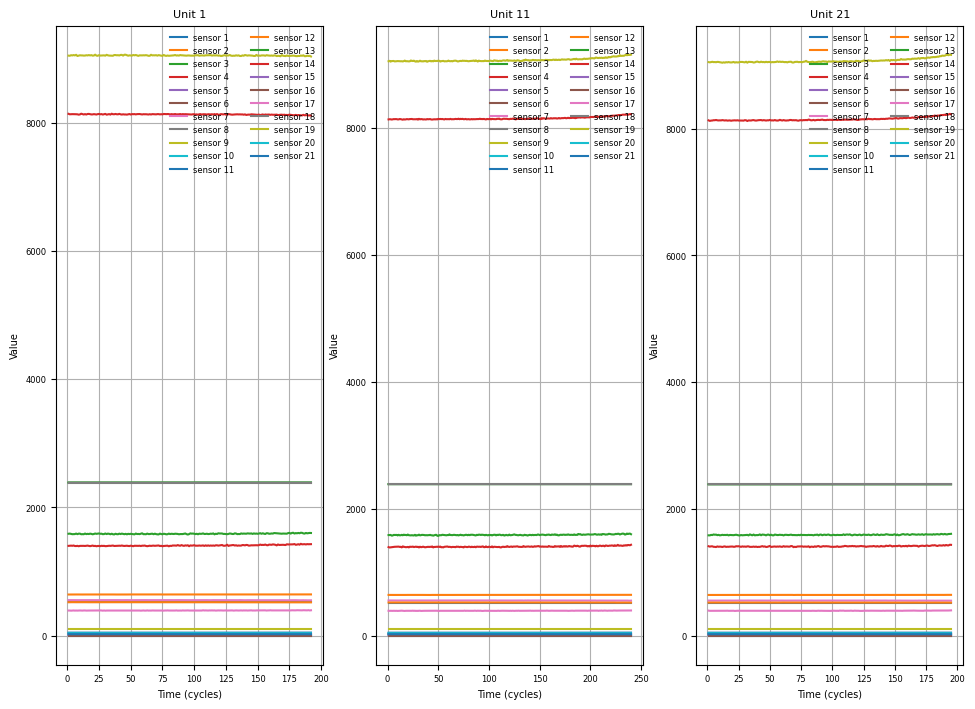

In [88]:
def plot_unit(unit, ax, title=None):
    # Select only the sensor columns
    sensor_cols = [col for col in unit.columns if "sensor measurement" in col]

    for i, col in enumerate(sensor_cols):
        ax.plot(unit["time, in cycles"], unit[col], label=f"sensor {i+1}")

    if title:
        ax.set_title(title, fontsize=8, pad=6)  # small title, controlled padding
    ax.set_xlabel("Time (cycles)", fontsize=7, labelpad=4)
    ax.set_ylabel("Value", fontsize=7, labelpad=4)
    ax.tick_params(axis='both', labelsize=6)   # small tick labels
    ax.grid(True)
    ax.legend(fontsize=6, frameon=False, loc="upper right", ncol=2)


# --- Plot 3 units next to each other ---
fig, axes = plt.subplots(1, 3, figsize=(11.7, 8.3))  # A4 landscape in inches

for i, ax in enumerate(axes):
    unit_n = i*10+1
    plot_unit(units[unit_n], ax=ax, title=f"Unit {unit_n}")
